In [ ]:
#!pip install sklearn
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
# 1. 데이터 불러오기
data = pd.read_csv('/content/drive/MyDrive/ThoraricSurgery.csv)

,293,1,3.8,2.8,0,0.1,0.2,0.3,0.4,0.5,12,0.6,0.7,0.8,1.1,0.9,62,0.10
0,1,2,2.88,2.16,1,0,0,0,1,1,14.000,0,0,0,1,0,60,0
1,8,2,3.19,2.50,1,0,0,0,1,0,11.000,0,0,1,1,0,66,1
2,14,2,3.98,3.06,2,0,0,0,1,1,11.444,0,0,0,1,0,80,1
3,17,2,2.21,1.88,0,0,1,0,0,0,12.000,0,0,0,1,0,56,0
4,18,2,2.96,1.67,0,0,0,0,0,0,12.000,0,0,0,1,0,61,0


In [ ]:
#데이터 확인
data.head()

,293,1,3.8,2.8,0,0.1,0.2,0.3,0.4,0.5,12,0.6,0.7,0.8,1.1,0.9,62,0.10
0,1,2,2.88,2.16,1,0,0,0,1,1,14.000,0,0,0,1,0,60,0
1,8,2,3.19,2.50,1,0,0,0,1,0,11.000,0,0,1,1,0,66,1
2,14,2,3.98,3.06,2,0,0,0,1,1,11.444,0,0,0,1,0,80,1
3,17,2,2.21,1.88,0,0,1,0,0,0,12.000,0,0,0,1,0,56,0
4,18,2,2.96,1.67,0,0,0,0,0,0,12.000,0,0,0,1,0,61,0


In [ ]:
#x, y분리 
x_data = data[data.columns[:-1]]
y_data = data[data.columns[-1]]

In [ ]:
# train validation test split
x_train1, x_test, y_train1, y_test = train_test_split(x_data, y_data, test_size=0.2, shuffle=True,)
x_train, x_valid, y_train, y_valid = train_test_split(x_train1, y_train1, test_size=0.3, shuffle=True)

In [ ]:
x_train.shape

(262, 17)

In [ ]:
# 모델 설계 
activation_function = tf.keras.activations.relu

input_Layer = tf.keras.layers.Input(shape=(17,))
x = tf.keras.layers.Dense(10,activation = activation_function,kernel_initializer=tf.keras.initializers.he_normal())(input_Layer)
x = tf.keras.layers.Dense(10,activation = activation_function,kernel_initializer=tf.keras.initializers.glorot_uniform())(x)
output_layer = tf.keras.layers.Dense(1,activation = 'sigmoid')(x)

model = tf.keras.models.Model(inputs = [input_Layer],outputs = [output_layer])
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 17)]              0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                180       
_________________________________________________________________
dense_14 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 11        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [ ]:
learning_rate = 0.03
loss = tf.keras.losses.binary_crossentropy 
optimizer = tf.keras.optimizers.SGD(learning_rate = learning_rate)
metrics = tf.keras.metrics.binary_accuracy

model.compile(loss = loss,
              optimizer=  optimizer,
              metrics = [metrics])

In [ ]:
history = model.fit(x_train,y_train, epochs = 100, batch_size = 10, validation_data = (x_valid,y_valid))

Epoch 1/100
27/27 [==============================] - 1s 8ms/step - loss: 2.9919 - binary_accuracy: 0.8130 - val_loss: 0.6463 - val_binary_accuracy: 0.8584
Epoch 2/100
27/27 [==============================] - 0s 3ms/step - loss: 0.5982 - binary_accuracy: 0.8473 - val_loss: 0.5708 - val_binary_accuracy: 0.8584
Epoch 3/100
27/27 [==============================] - 0s 2ms/step - loss: 0.5437 - binary_accuracy: 0.8473 - val_loss: 0.5246 - val_binary_accuracy: 0.8584
Epoch 4/100
27/27 [==============================] - 0s 3ms/step - loss: 0.5086 - binary_accuracy: 0.8435 - val_loss: 0.4920 - val_binary_accuracy: 0.8584
Epoch 5/100
27/27 [==============================] - 0s 3ms/step - loss: 0.4858 - binary_accuracy: 0.8435 - val_loss: 0.4839 - val_binary_accuracy: 0.8584
Epoch 6/100
27/27 [==============================] - 0s 3ms/step - loss: 0.4718 - binary_accuracy: 0.8473 - val_loss: 0.4614 - val_binary_accuracy: 0.8584
Epoch 7/100
27/27 [==============================] - 0s 3ms/step - los

In [ ]:
history.history.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

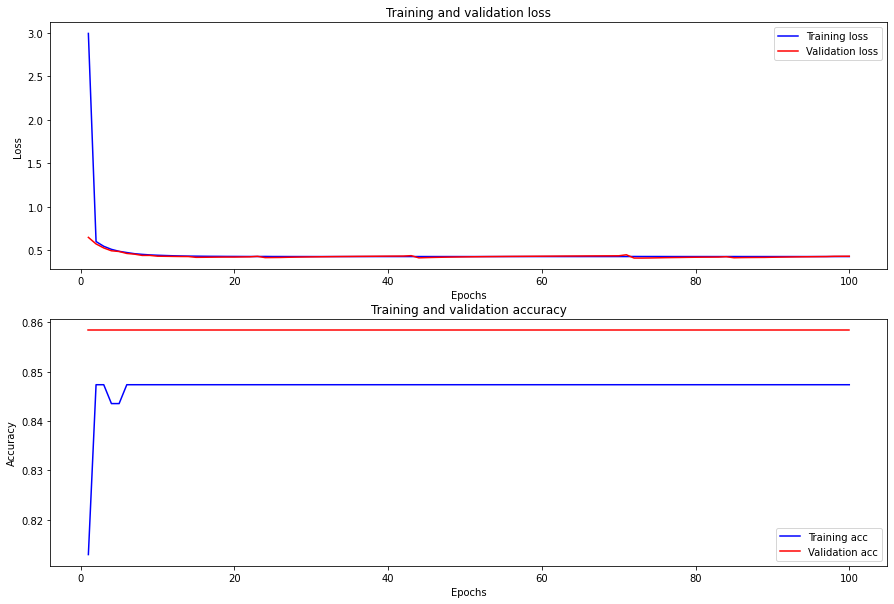

In [ ]:
plt.figure(figsize = (15,10))
loss = history.history['loss']
val_loss = history.history['val_loss']
# loss와 val_loss를 그래프
epochs = range(1, len(loss)+1)
plt.subplot(211)
plt.plot(epochs, loss, 'b-', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']

plt.subplot(212)  ## 2x1 개의 그래프 중에 2번째
plt.plot(epochs, acc, 'b-', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()